# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

In [ ]:
# Try loading one file

df = pd.read_parquet('/2023-1.parquet')

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
dataset = r"/content/drive/My Drive/trip_records"

# Create a list of all the twelve files to read
file_list = os.listdir(dataset)

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(dataset, file_name)

        # Reading the current file
        current_data = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        current_data['tpep_pickup_datetime'] = pd.to_datetime(current_data['tpep_pickup_datetime'])
        current_data['pickup_date'] = current_data['tpep_pickup_datetime'].dt.date
        current_data['pickup_hour'] = current_data['tpep_pickup_datetime'].dt.hour

        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in current_data['pickup_date'].unique():
            date_df = current_data[current_data['pickup_date']== date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_df = date_df[date_df['pickup_hour'] == hour]

                # Sample 5% of the hourly data randomly
                if not hour_df.empty:
                    sample = hour_df.sample(frac=0.05, random_state=42)

                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
        print(f"Processed and sampled {file_name}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
df=df
output_file_path = r"/content/drive/My Drive/NYC_Taxirecords-2023"
df.to_parquet(output_file_path)

Processed and sampled 2023-1.parquet
Processed and sampled 2023-2.parquet
Processed and sampled 2023-3.parquet
Processed and sampled 2023-4.parquet
Processed and sampled 2023-5.parquet
Processed and sampled 2023-6.parquet
Processed and sampled 2023-7.parquet
Processed and sampled 2023-8.parquet
Processed and sampled 2023-9.parquet
Processed and sampled 2023-10.parquet
Processed and sampled 2023-11.parquet
Processed and sampled 2023-12.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet(r"/content/drive/My Drive/NYC_Taxirecords-2023")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df=pd.read_parquet(r"/content/drive/My Drive/NYC_Taxirecords-2023")



In [ ]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
428,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1113,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
819,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3192,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
2995263,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN
4719,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,7.10,1.0,N,246,37,1,...,0.5,7.90,0.0,1.0,47.40,2.5,0.00,2023-01-01,0,NaN
1548,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2.0,1.59,1.0,N,79,164,1,...,0.5,3.28,0.0,1.0,19.68,2.5,0.00,2023-01-01,0,NaN
2504,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1.0,3.16,1.0,N,79,256,1,...,0.5,6.02,0.0,1.0,30.12,2.5,0.00,2023-01-01,0,NaN
1686,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1.0,7.64,1.0,N,132,95,1,...,0.5,7.09,0.0,1.0,42.54,0.0,1.25,2023-01-01,0,NaN
591,1,2023-01-01 00:15:25,2023-01-01 00:22:35,2.0,0.90,1.0,N,148,114,1,...,0.5,1.00,0.0,1.0,13.90,2.5,0.00,2023-01-01,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 3196303
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,138,256,2,32.40,6.0,0.00,0.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,161,237,1,7.90,1.0,2.58,0.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,237,141,2,11.40,1.0,0.00,0.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,143,142,2,6.50,1.0,0.00,0.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,<NA>,19.24,<NA>,66,107,0,25.64,0.0,5.93,0.0,35.57,NaN,NaN,NaN


In [ ]:
df['RatecodeID'] = df['RatecodeID'].astype('Int64')
df['passenger_count'] = df['passenger_count'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        Int64         
 4   trip_distance          float64       
 5   RatecodeID             Int64         
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
 15  airport_fee            float64       
 16  Airport_fee            float64       
dtypes: Int64(2), datetime64[us](2), float64(9), int64(4)
memory usage

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

df['combined_airport_fee']= df[['airport_fee','Airport_fee']].max(axis=1)
df.drop(['airport_fee','Airport_fee'],axis=1,inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,combined_airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,138,256,2,32.40,6.0,0.00,0.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,161,237,1,7.90,1.0,2.58,0.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,237,141,2,11.40,1.0,0.00,0.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,143,142,2,6.50,1.0,0.00,0.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,<NA>,19.24,<NA>,66,107,0,25.64,0.0,5.93,0.0,35.57,NaN,NaN


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
df[df['fare_amount']<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,combined_airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
print(df[df['fare_amount']<0]['RatecodeID'].value_counts())


Series([], Name: count, dtype: Int64)


In [ ]:
# Find which columns have negative values

colums_with_numbers = df.select_dtypes(include='number')
negative_values = (colums_with_numbers < 0).any()
negative_columns = negative_values[negative_values].index.tolist()
print("negative value columns:", negative_columns)

negative value columns: ['extra', 'total_amount', 'congestion_surcharge', 'combined_airport_fee']


In [ ]:
# fix these negative values

for col in negative_columns: # Replace negative values with 0
    df.loc[df[col] < 0, col] = 0
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        Int64         
 4   trip_distance          float64       
 5   RatecodeID             Int64         
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
 15  combined_airport_fee   float64       
dtypes: Int64(2), datetime64[us](2), float64(8), int64(4)
memory usage: 235.1 MB


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,combined_airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,138,256,2,32.40,6.0,0.00,0.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,161,237,1,7.90,1.0,2.58,0.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,237,141,2,11.40,1.0,0.00,0.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,143,142,2,6.50,1.0,0.00,0.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,<NA>,19.24,<NA>,66,107,0,25.64,0.0,5.93,0.0,35.57,NaN,NaN


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
df.isna().mean()*100

,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,3.420903
trip_distance,0.000000
RatecodeID,3.420903
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000
fare_amount,0.000000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df.isnull().any(axis=1)]

df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)
print(df['passenger_count'].isna().sum())

0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0],inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(),inplace=True)
print(df['congestion_surcharge'].isnull().sum())
print(df.isna().mean()*100)


0
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
congestion_surcharge     0.000000
combined_airport_fee     3.420903
dtype: float64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df['combined_airport_fee'].fillna(0,inplace=True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present


df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,combined_airport_fee
count,1.896400e+06,1896400,1896400,1896400.0,1.896400e+06,1896400.0,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.831526e+06
mean,1.733026e+00,2023-07-02 19:59:52.930795,2023-07-02 20:17:18.919562,1.356585,3.858293e+00,1.612981,1.652814e+02,1.640515e+02,1.163817e+00,1.991935e+01,1.588020e+00,3.547011e+00,5.965338e-01,2.898201e+01,2.314182e+00,1.429109e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.0,0.000000e+00,1.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.0,1.050000e+00,1.0,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.0,1.790000e+00,1.0,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,2.850000e+00,0.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.0,3.400000e+00,1.0,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,4.420000e+00,0.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.0,1.263605e+05,99.0,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,2.230800e+02,1.430000e+02,1.431675e+05,2.500000e+00,1.750000e+00
std,4.476401e-01,NaN,NaN,0.879916,1.294085e+02,7.267261,6.400038e+01,6.980207e+01,5.081384e-01,1.055371e+02,1.829197e+00,4.054882e+00,2.187878e+00,1.064162e+02,6.557557e-01,4.648449e-01


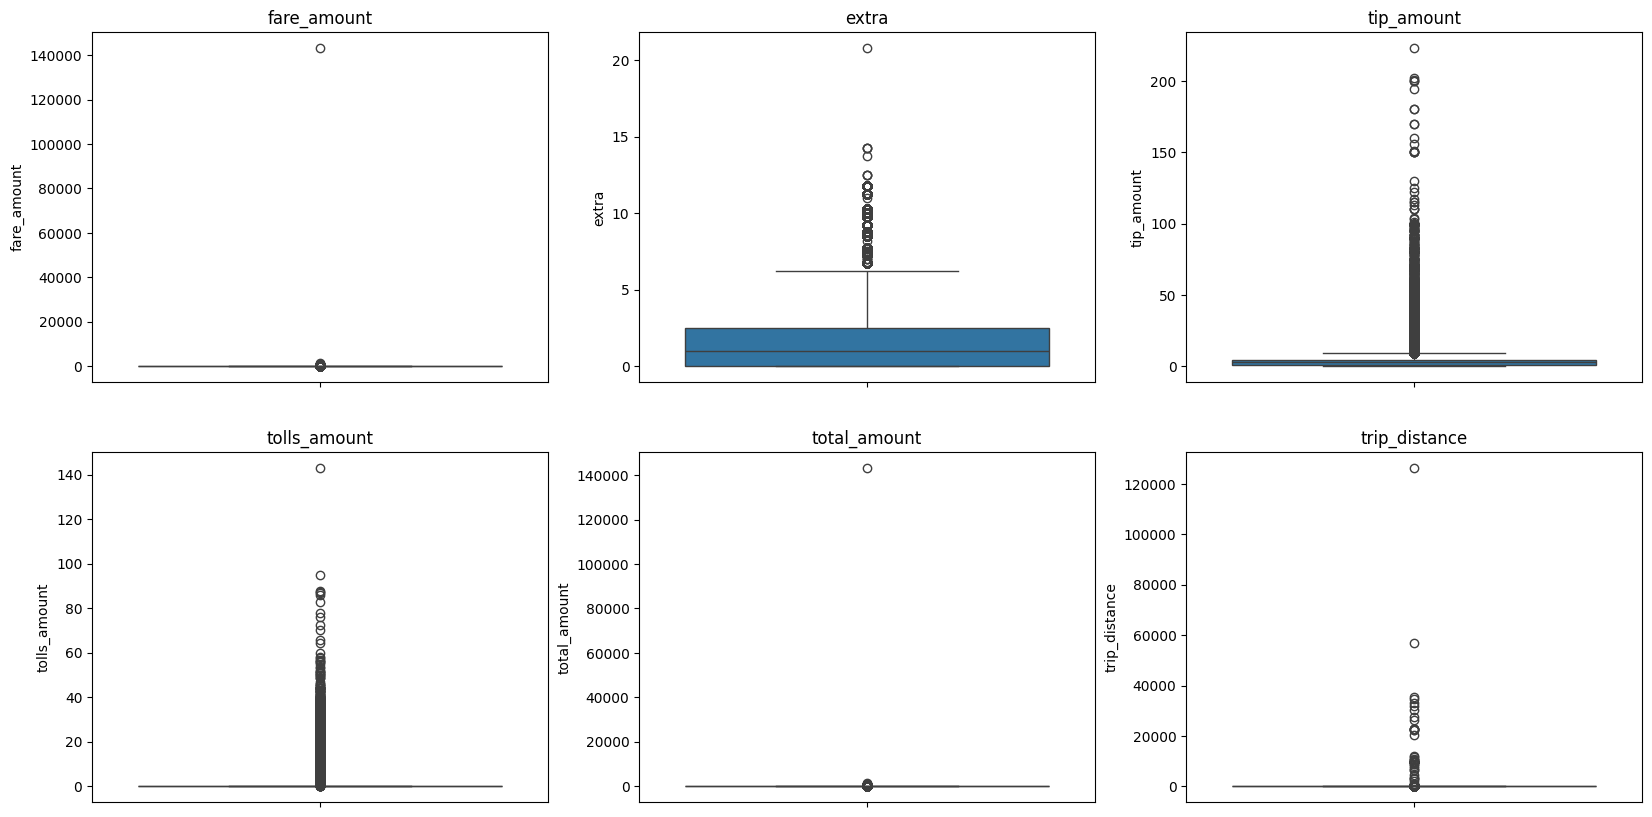

In [ ]:
# Check for potential out of place values in various columns
check_col = ['fare_amount','extra','tip_amount','tolls_amount','total_amount','trip_distance']

plt.figure(figsize=(20,10))
for i, col in enumerate(check_col, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col].dropna())
    plt.title(col)
plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df=df[df['passenger_count']<=6]

In [ ]:
# Continue with outlier handling
df=df[~((df['trip_distance'] == 0) & (df['fare_amount'] > 300))]
df=df[~((df['trip_distance'] == 0) & (df['fare_amount'] ==0)&(df['PULocationID']))]
df=df[df['trip_distance']<=250]
df=df[df['payment_type']!=0]


In [ ]:
# Do any columns need standardising?
cols_to_normalize = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount']
for col in cols_to_normalize:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'combined_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

Text(0.5, 1.0, 'Hourly Trends in Taxi Pickups')

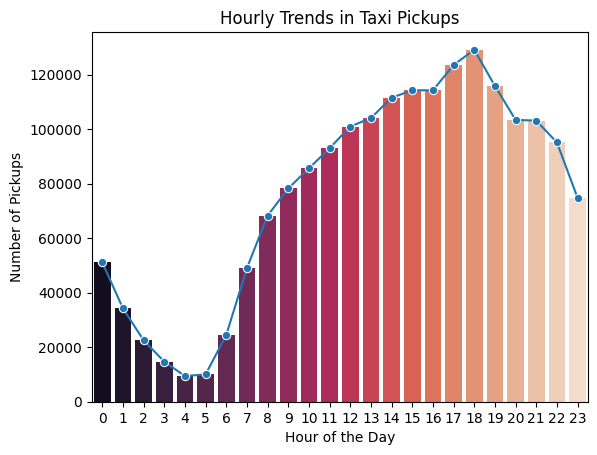

In [ ]:
# Find and show the hourly trends in taxi pickups

df['pickup_time_derived'] = df['tpep_pickup_datetime'].dt.hour

# Calculate the number of pickups for each hour
hourly_pickups = df['pickup_time_derived'].value_counts().sort_index()

# Plot the hourly trends in taxi pickups
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, marker='o')
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values,palette='rocket')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trends in Taxi Pickups')


Text(0.5, 1.0, 'Daily Trends in Taxi Pickups')

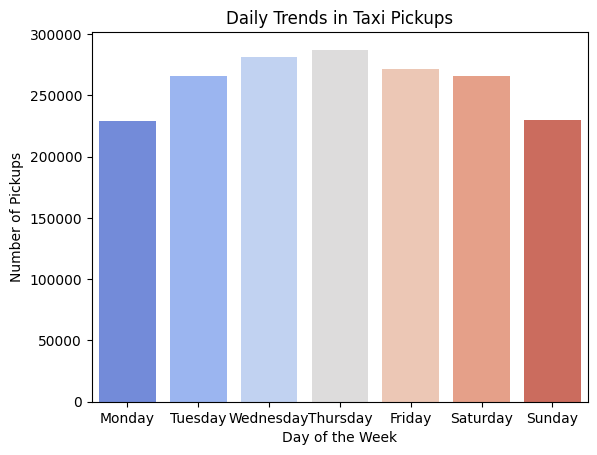

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day_derived'] = df['tpep_pickup_datetime'].dt.dayofweek


day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day_name_derived'] = df['pickup_day_derived'].map(day_name_map)

daily_pickups = df['pickup_day_name_derived'].value_counts().reindex(day_name_map.values())
sns.barplot(x=daily_pickups.index, y=daily_pickups.values,palette='coolwarm')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Taxi Pickups')


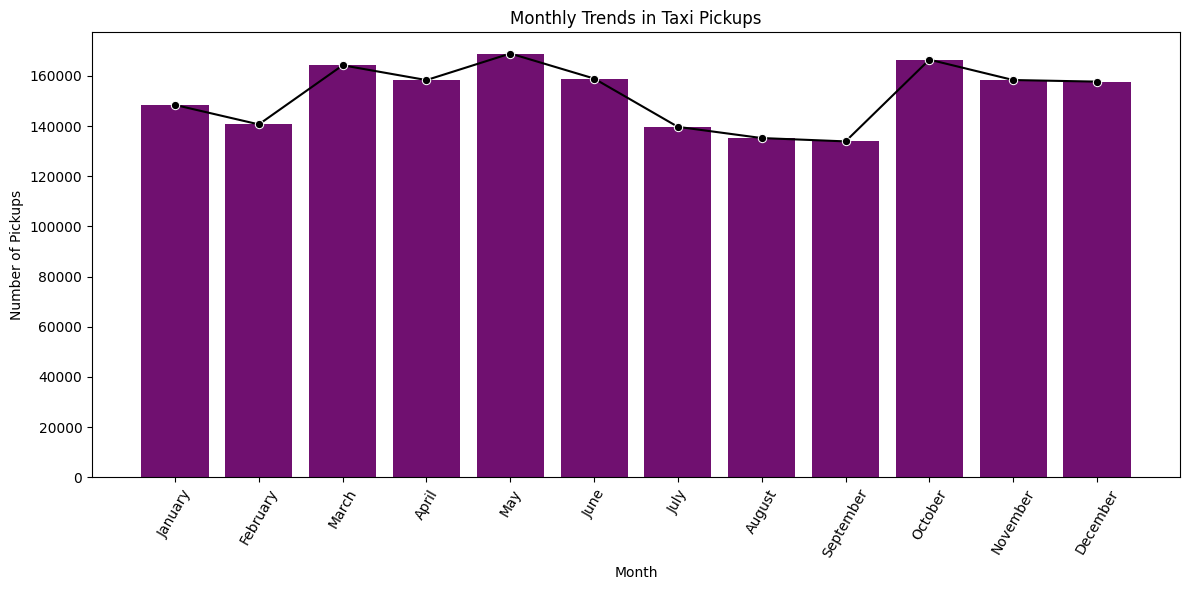

In [ ]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
monthly_pickups = df.groupby('pickup_month')['tpep_pickup_datetime'].count()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups = monthly_pickups.reindex(months_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values,color='purple')
sns.lineplot(x=monthly_pickups.index, y=monthly_pickups.values, marker='o',color='black')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Monthly Trends in Taxi Pickups')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df[financial_columns].describe()


,fare_amount,tip_amount,total_amount,trip_distance
count,1.831276e+06,1.831276e+06,1.831276e+06,1.831276e+06
mean,1.384316e-04,1.601999e-02,2.021581e-04,1.681663e-02
std,7.498002e-04,1.824215e-02,7.559076e-04,2.218995e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.496071e-05,4.482697e-03,1.114779e-04,5.125452e-03
50%,9.429781e-05,1.282051e-02,1.466814e-04,8.737675e-03
75%,1.529720e-04,1.994800e-02,2.144342e-04,1.645026e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


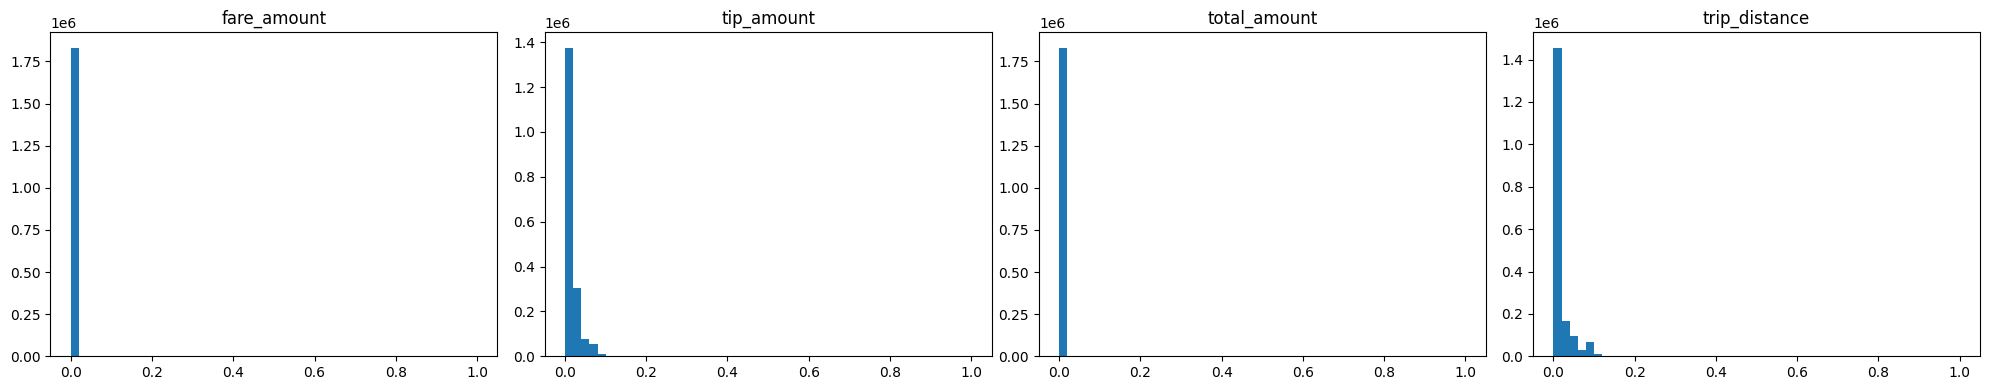

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
for ax, col in zip(axs.flatten(), financial_columns):
    ax.hist(df[col].dropna(), bins=50)
    ax.set_title(col)
plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

non_zero_df = df[df[financial_columns].all(axis=1)]
non_zero_df.head()
filtered_df = df.copy()

filtered_df = filtered_df[
    (filtered_df['fare_amount'] != 0) &
    (filtered_df['tip_amount'] != 0) &
    (filtered_df['total_amount'] != 0) &
    (filtered_df['trip_distance'] != 0)
]
print(f"Original shape: {df.shape}")
print(f"Filtered shape: {filtered_df.shape}")


Original shape: (1831276, 20)
Filtered shape: (1412905, 20)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

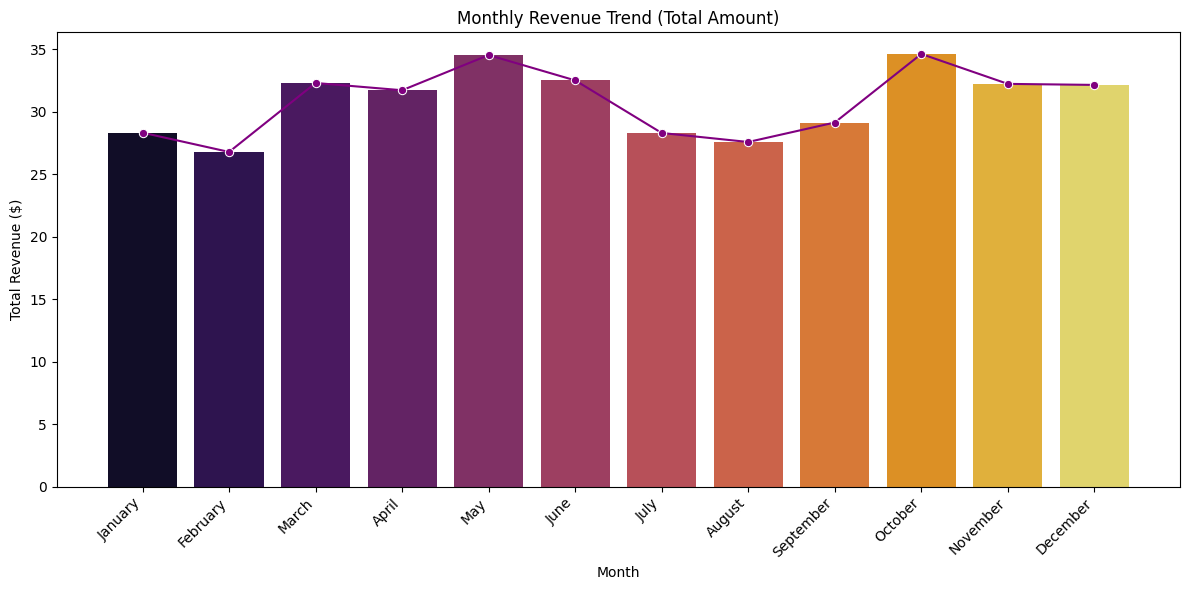

In [ ]:
# Group data by month and analyse monthly revenue

if 'pickup_month' not in df.columns:
    df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(months_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values,palette='inferno')
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o',color='purple')
plt.title('Monthly Revenue Trend (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

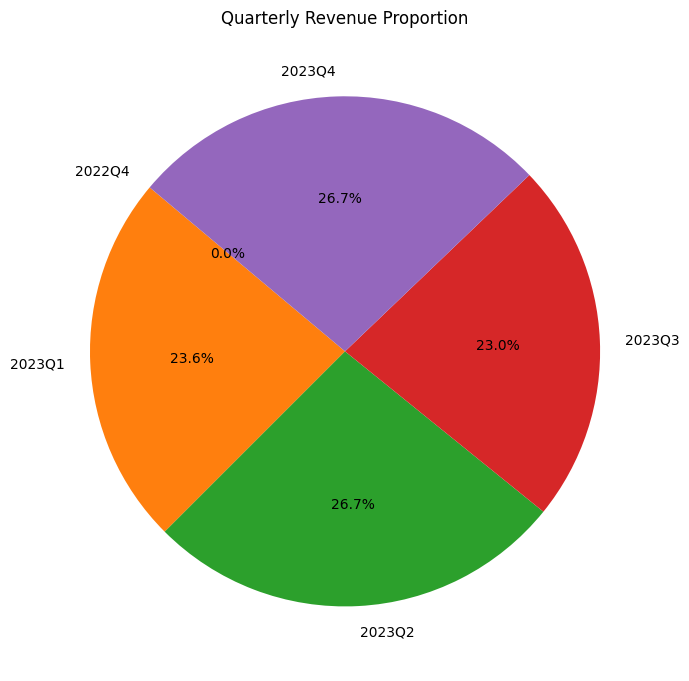

In [ ]:
# Calculate proportion of each quarter

df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100
plt.figure(figsize=(7, 7))
plt.pie(quarterly_proportion, labels=quarterly_proportion.index, autopct='%1.1f%%',startangle=140)
plt.title('Quarterly Revenue Proportion')
plt.axis('equal')
plt.tight_layout()
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

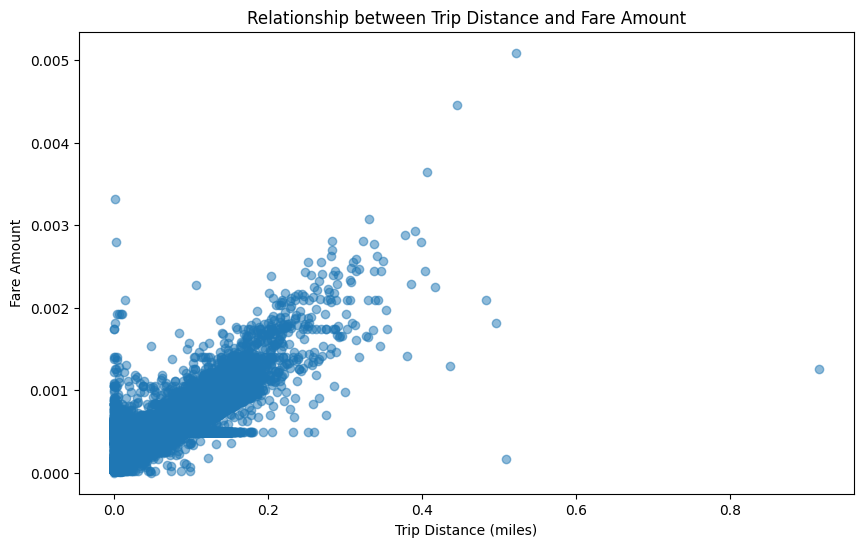

Correlation between Trip Distance and Fare Amount: 0.95


In [ ]:
# Show how trip fare is affected by distance

filtered_df = non_zero_df[non_zero_df['trip_distance'] > 0]

# Plot the relationship between trip_distance and fare_amount
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['trip_distance'], filtered_df['fare_amount'], alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.title('Relationship between Trip Distance and Fare Amount')
plt.show()


correlation_value = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f'Correlation between Trip Distance and Fare Amount: {correlation_value:.2f}')

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation: 0.33


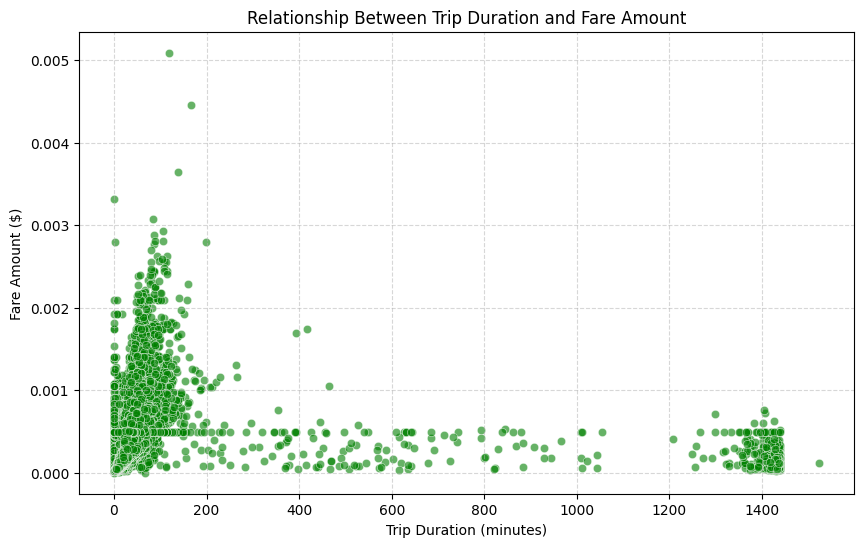

In [ ]:
# Show relationship between fare and trip duration
# Convert timestamps and compute trip duration in minutes
filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'])
filtered_df['tpep_dropoff_datetime'] = pd.to_datetime(filtered_df['tpep_dropoff_datetime'])
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60

filtered_df = filtered_df[filtered_df['trip_duration'] > 0]
print(f"Correlation: {filtered_df['trip_duration'].corr(filtered_df['fare_amount']):.2f}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=filtered_df, color='green', alpha=0.6)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Duration and Fare Amount")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()




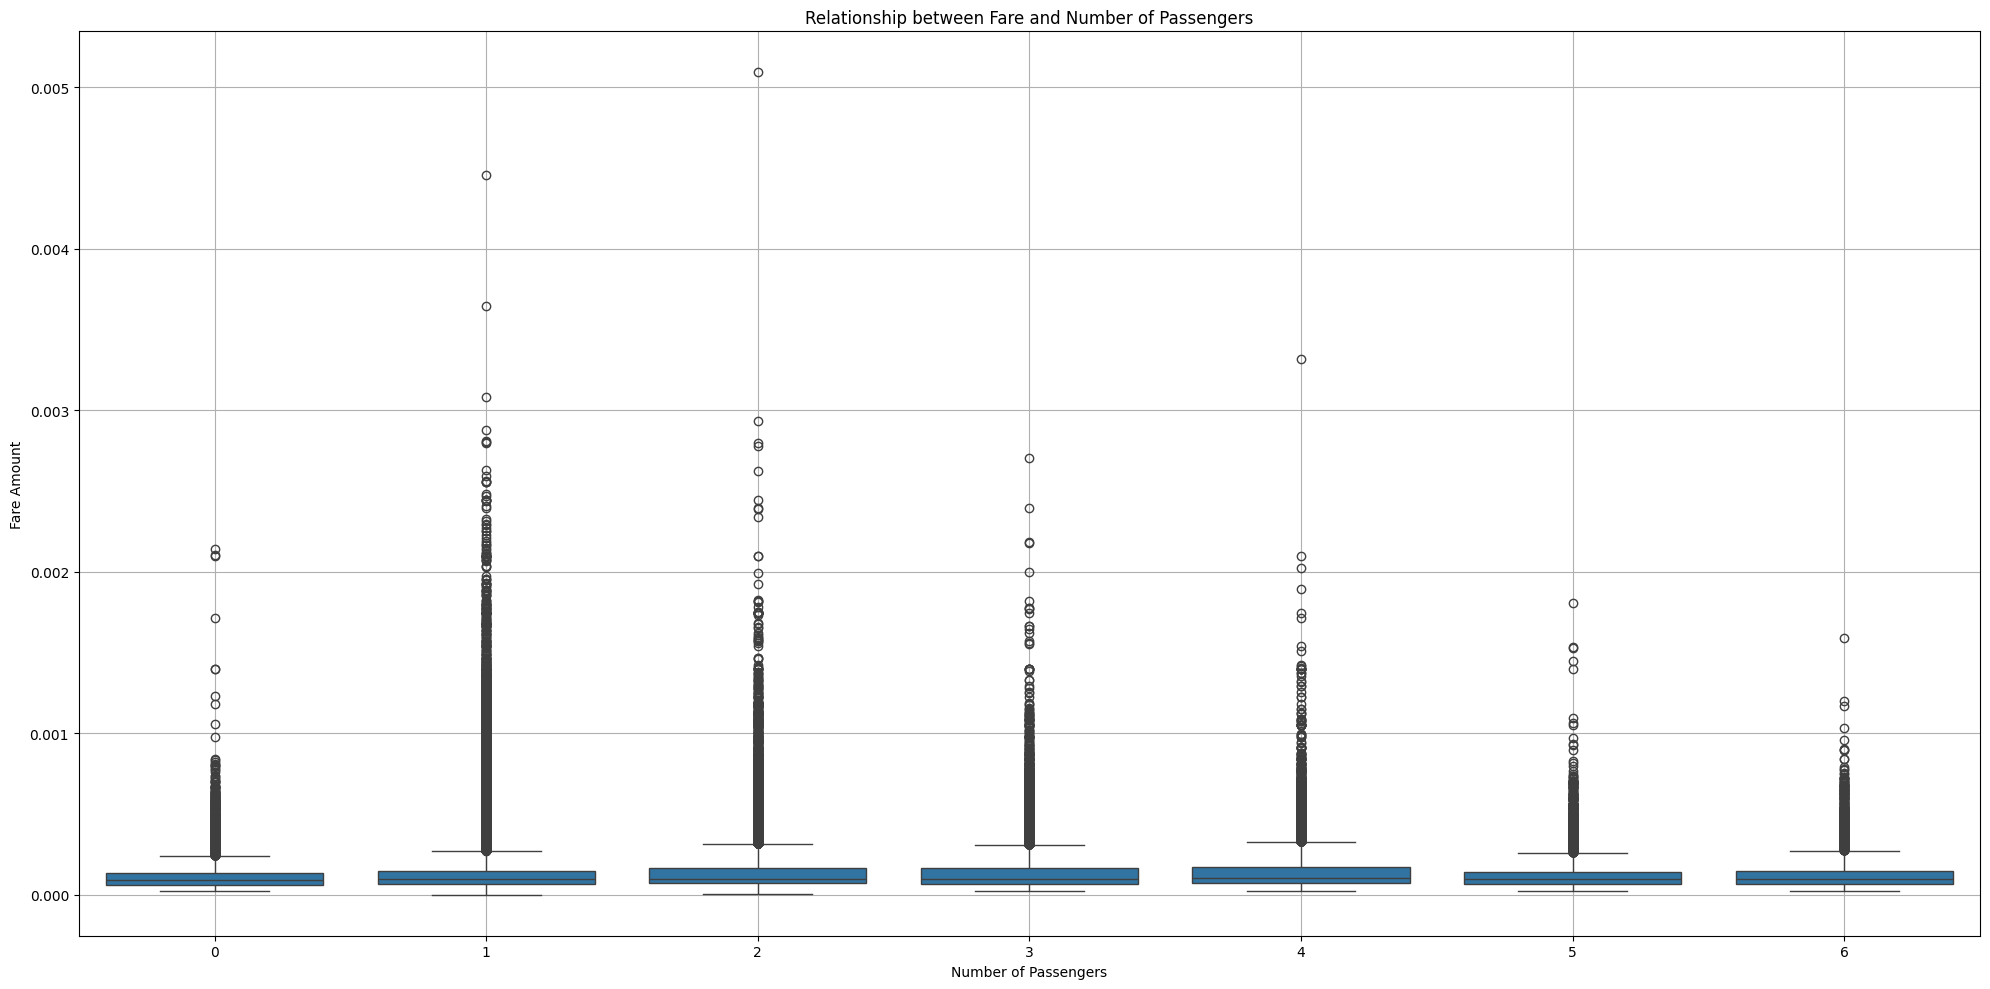

Correlation between Passenger Count and Fare Amount: 0.0403


In [ ]:
# Show relationship between fare and number of passengers

df = non_zero_df.copy()
df_reset = df.reset_index(drop=True)

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_reset, x='passenger_count', y='fare_amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.title('Relationship between Fare and Number of Passengers')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_value_passenger_fare = df_reset['passenger_count'].corr(df_reset['fare_amount'])
print(f'Correlation between Passenger Count and Fare Amount: {correlation_value_passenger_fare:.4f}')


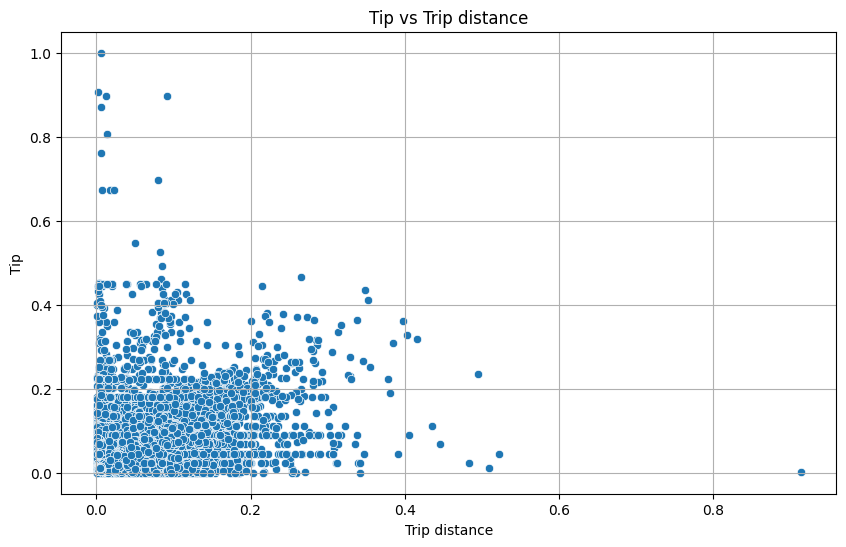

Correlation between trip distance and tip given: 0.80


In [ ]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='tip_amount')
plt.title('Tip vs Trip distance')
plt.xlabel('Trip distance')
plt.ylabel('Tip')
plt.grid(True)
plt.show()
corr_value = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between trip distance and tip given: {corr_value:.2f}")



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

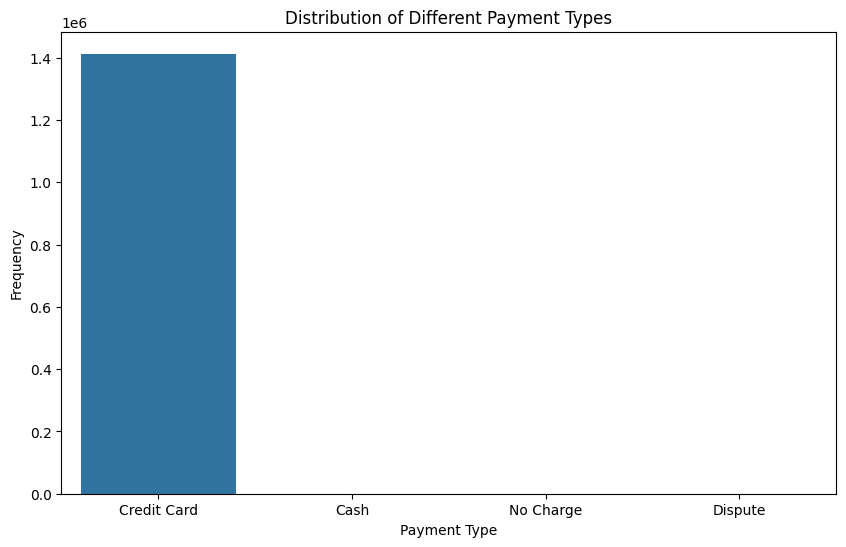

In [ ]:
# Analyse the distribution of different payment types (payment_type).

payment_types ={
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'}
payment_type_counts = df['payment_type'].value_counts()
payment_type_counts = payment_type_counts.reindex(payment_types.keys(), fill_value=0)
payment_labels = [payment_types.get(code, 'Unknown') for code in payment_type_counts.index]
payment_df = pd.DataFrame({
    'Type': payment_labels,
    'Count': payment_type_counts.values
})
payment_df = payment_df[payment_df['Count'] > 0].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_df, x='Type', y='Count')
plt.title('Distribution of Different Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"/content/drive/My Drive/taxi_zones/taxi_zones.shp")
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

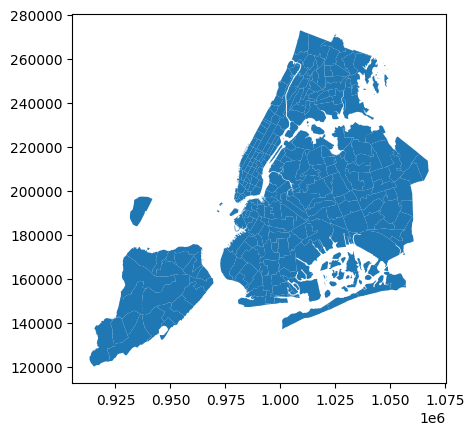

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
Taxi_data_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
Taxi_data_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_day_name_derived,pickup_month,trip_duration_derived,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,0.006053,1,161,237,1,0.000055,...,Sunday,January,5.083333,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
1,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2,0.034658,1,246,37,1,0.000241,...,Sunday,January,33.616667,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."
2,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2,0.007761,1,79,164,1,0.000080,...,Sunday,January,10.516667,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
3,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1,0.015425,1,79,256,1,0.000133,...,Sunday,January,15.883333,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
4,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1,0.037294,1,132,95,1,0.000221,...,Sunday,January,17.133333,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
trip_per_loc = df.groupby('PULocationID').size().reset_index(name='numoftrips')
trip_per_loc.head()


,PULocationID,numoftrips
0,1,35
1,2,2
2,4,1403
3,6,1
4,7,253


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame


zones_trips = pd.merge(zones, trip_per_loc, left_on='LocationID', right_on='PULocationID', how='left')
zones_trips.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,numoftrips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,35.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",NaN,NaN
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1403.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN,NaN


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

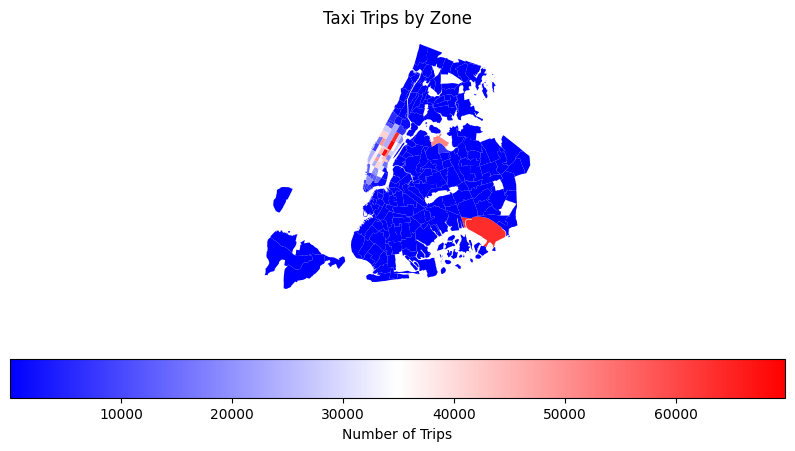

In [ ]:
# Define figure and axis
# Plot the map and display it
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
zones_trips.plot(
    column='numoftrips',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "horizontal"
    },
    cmap='bwr'
)
ax.set_title("Taxi Trips by Zone")
plt.axis('off')
plt.show()






In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones_trips.sort_values(by="numoftrips", ascending=False)
zones_sorted[["LocationID", "borough", "zone", "numoftrips"]].head(10)

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

grouped = non_zero_df.groupby(['PULocationID', 'DOLocationID', 'tpep_pickup_datetime'])

route_stats = grouped.agg({
    'trip_duration_derived': 'mean',
    'trip_distance': 'mean'
}).reset_index()


route_stats['speed'] = route_stats['trip_distance'] / (route_stats['trip_duration_derived'] / 60)
slow_routes = route_stats[route_stats['speed'] < 10]
slow_routes.head()



,PULocationID,DOLocationID,tpep_pickup_datetime,trip_duration_derived,trip_distance,speed
0,1,1,2023-02-06 16:26:31,0.116667,0.000293,0.150626
1,1,1,2023-02-14 13:13:04,0.116667,0.000244,0.125521
2,1,1,2023-03-06 12:55:36,0.316667,0.000244,0.046245
3,1,1,2023-03-09 19:02:51,0.083333,0.000195,0.140584
4,1,1,2023-03-24 11:41:59,0.116667,0.000244,0.125521


KeyboardInterrupt: 

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

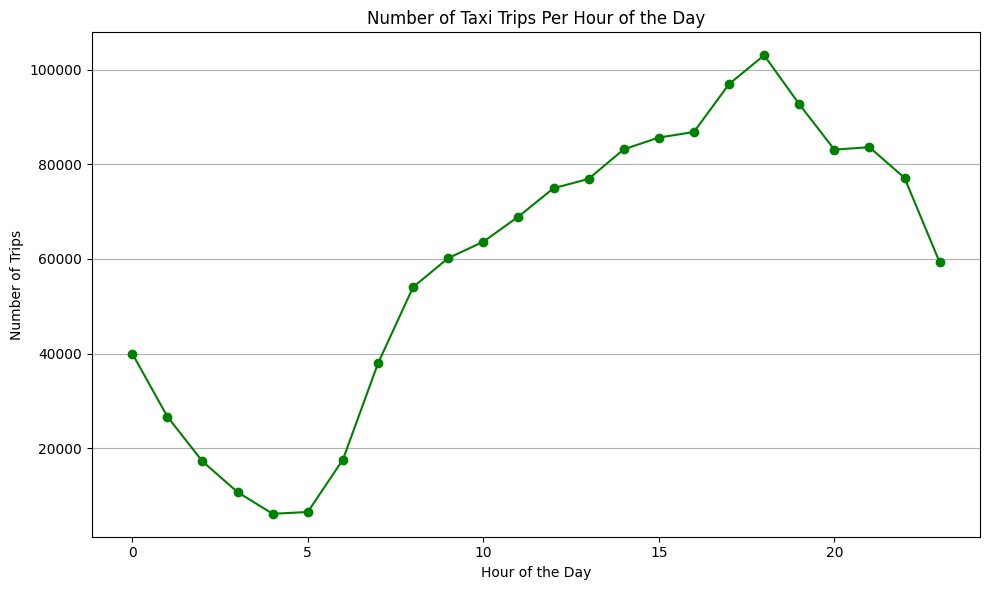

The busiest hour of the day is hour 18.
Number of trips during the busiest hour: 103058


In [ ]:
# Visualise the number of trips per hour and find the busiest hour

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trips = df['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_trips.plot(kind='line',marker='o',color='green')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Taxi Trips Per Hour of the Day')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

busiest_hour = hourly_trips.idxmax()
trips_in_busiest_hour = hourly_trips.max()

print(f"The busiest hour of the day is hour {busiest_hour}.")
print(f"Number of trips during the busiest hour: {trips_in_busiest_hour}")


In [ ]:
busiest_hour = hourly_trips.nlargest(5)
print("The five busiest hours:")
print(busiest_hour)


The five busiest hours:
pickup_hour
18    103058
17     96953
19     92730
16     86834
15     85665
Name: count, dtype: int64


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

busiest_hours = hourly_trips.nlargest(5)

# Fill in the value of your sampling fraction and use that to scale up the numbers
sampling_ratio = 0.05

actual_trips_busiest_hours = busiest_hours / sampling_ratio

print("\nActual number of trips in the five busiest hours (scaled from sample):")
print(actual_trips_busiest_hours.astype(int))




Actual number of trips in the five busiest hours (scaled from sample):
pickup_hour
18    2061160
17    1939060
19    1854600
16    1736680
15    1713300
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

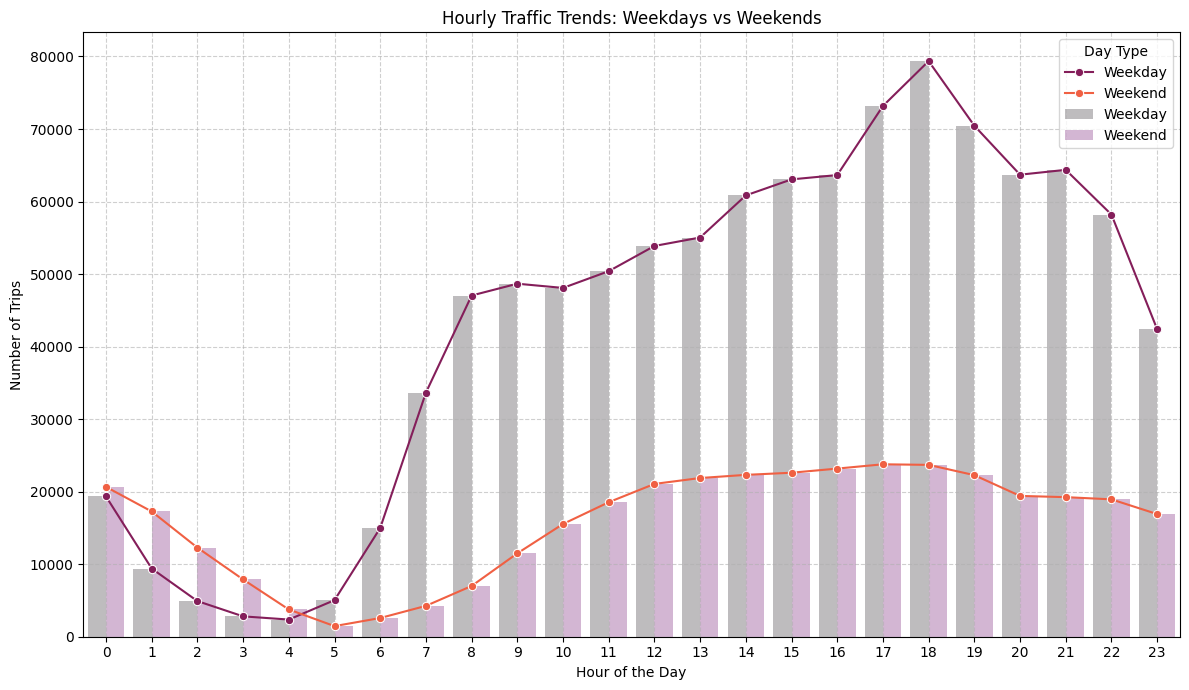

In [ ]:
# Compare traffic trends for the week days and weekends

df['day_type'] = df['pickup_day_derived'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group data by day type and hour
hourly_traffic_by_day_type = df.groupby(['day_type', 'pickup_hour']).size().reset_index(name='trip_count')

plt.figure(figsize=(12, 7))
sns.lineplot(data=hourly_traffic_by_day_type, x='pickup_hour', y='trip_count', hue='day_type', marker='o',palette='rocket')
sns.barplot(data=hourly_traffic_by_day_type, x='pickup_hour', y='trip_count', hue='day_type', alpha=0.3,color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Traffic Trends: Weekdays vs Weekends')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

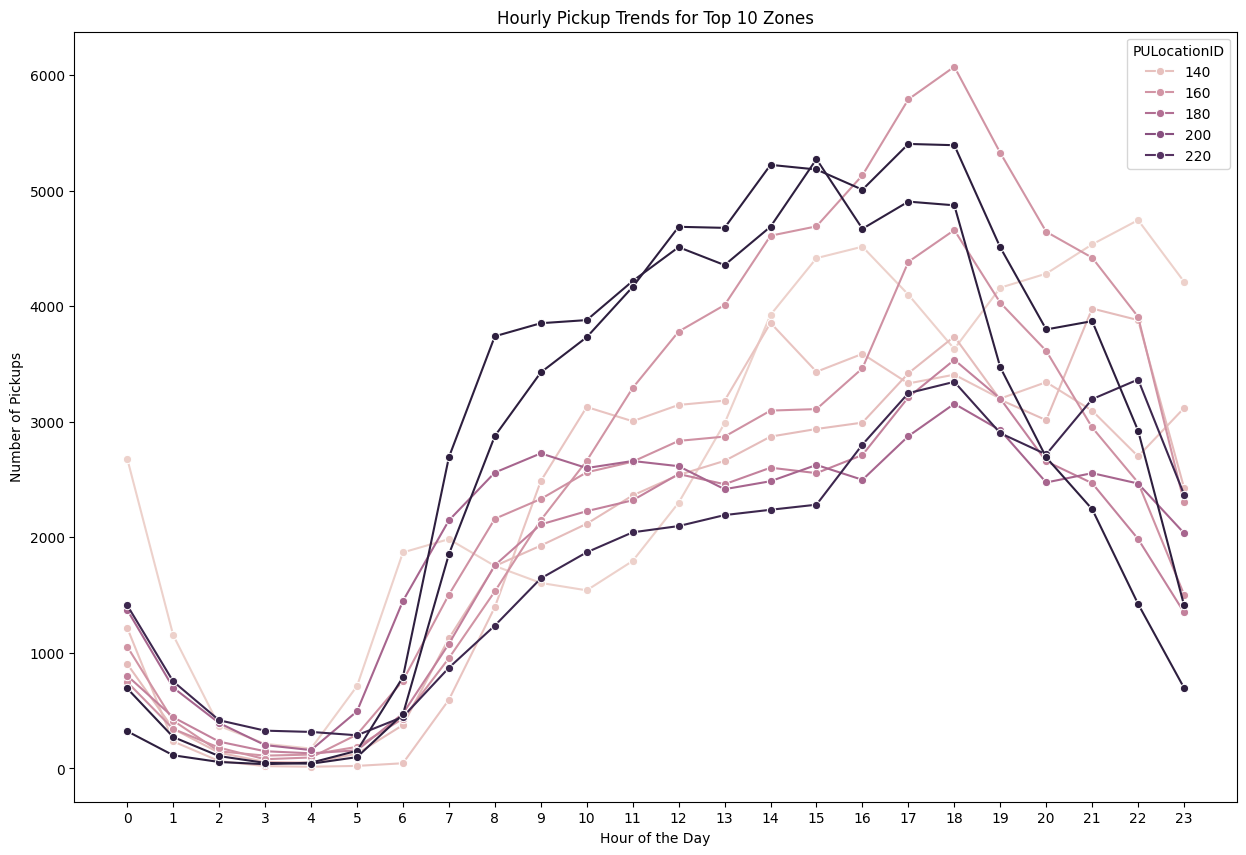

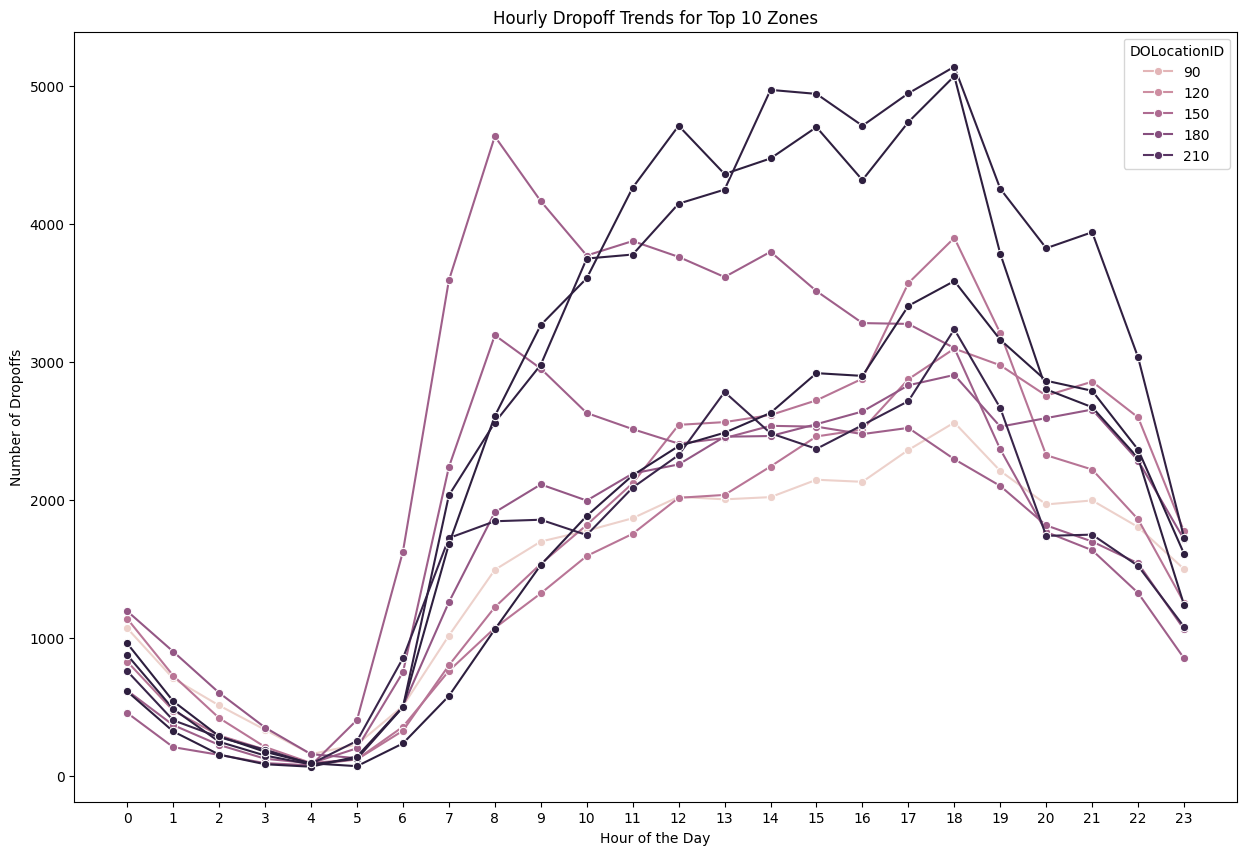

In [ ]:
# Find top 10 pickup and dropoff zones

# Group by PULocationID and hour of the day to find the number of pickups
pickup_counts = non_zero_df.groupby(['PULocationID', 'pickup_time_derived']).size().reset_index(name='pickup_count')

top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index
top_pickup_data = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]

# Plot the hourly pickup trends for the top 10 zones
plt.figure(figsize=(15, 10))
sns.lineplot(data=top_pickup_data, x='pickup_time_derived', y='pickup_count', hue='PULocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.legend(title='PULocationID')
plt.xticks(range(24))
plt.show()

# Group by DOLocationID and hour of the day to find the number of dropoffs
dropoff_counts = non_zero_df.groupby(['DOLocationID','pickup_time_derived']).size().reset_index(name='dropoff_count')


top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index
top_dropoff_data = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot the hourly dropoff trends for the top 10 zones
plt.figure(figsize=(15, 10))
sns.lineplot(data=top_dropoff_data, x='pickup_time_derived', y='dropoff_count', hue='DOLocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.legend(title='DOLocationID')
plt.xticks(range(24))
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

Top 10 pickup/dropoff ratios:
     LocationID  pickup_count
1             2           2.0
193         199           2.0
69           70        6402.0
126         132       63639.0
132         138       51617.0
201         207          12.0
180         186       48583.0
42           43       23917.0
108         114       19825.0
243         249       33898.0
Bottom 10 pickup/dropoff ratios:
    LocationID  pickup_count
2            3           0.0
4            5           0.0
14          15           0.0
26          27           0.0
29          30           0.0
31          32           0.0
43          44           0.0
57          58           0.0
77          78           0.0
83          84           0.0


<Figure size 1000x600 with 0 Axes>

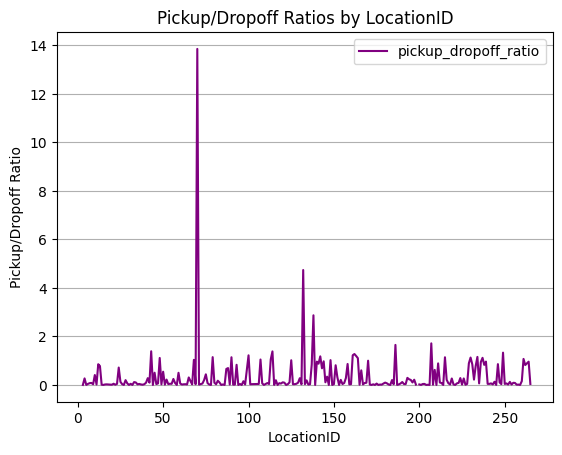

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

merged_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)
merged_counts['pickup_dropoff_ratio'] = merged_counts['pickup_count'] / merged_counts['dropoff_count']

top_ratios = merged_counts.nlargest(10, 'pickup_dropoff_ratio')
print("Top 10 pickup/dropoff ratios:")
print(top_ratios[['LocationID', 'pickup_count']])
bottom_ratios = merged_counts.nsmallest(10, 'pickup_dropoff_ratio')
print("Bottom 10 pickup/dropoff ratios:")
print(bottom_ratios[['LocationID', 'pickup_count']])
plt.figure(figsize=(10, 6))
merged_counts.plot(kind='line', x='LocationID', y='pickup_dropoff_ratio', color='purple')
plt.xlabel('LocationID')
plt.ylabel('Pickup/Dropoff Ratio')
plt.title('Pickup/Dropoff Ratios by LocationID')
plt.grid(axis='y')
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 pickup/dropoff ratios during night hours:
   LocationID  pickup_count
0          79         12843
1         249         10494
2         132          9509
3          48          8060
4         148          8005
5         114          7285
6         230          5881
7         186          5354
8         164          4786
9         138          4689
Top 10 dropoff ratios during night hours:
   LocationID  dropoff_count
0          79           6754
1          48           5106
2         170           5046
3         107           4851
4          68           4503
5         141           4480
6         263           4231
7         249           4133
8         239           3733
9         236           3690


<Figure size 1000x600 with 0 Axes>

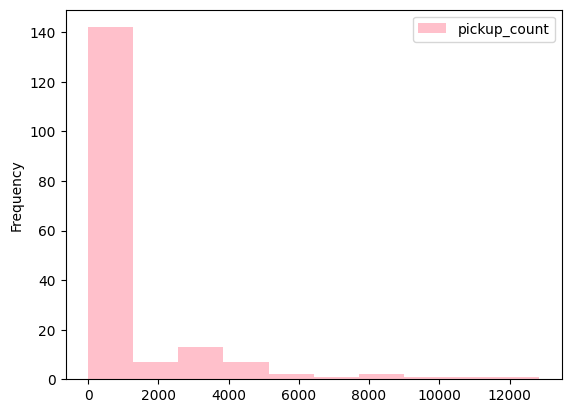

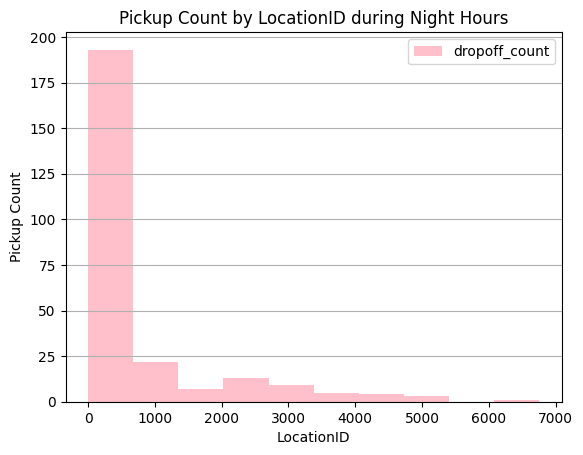

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour
night_df=non_zero_df[(non_zero_df['pickup_hour']>=23) | (non_zero_df['pickup_hour']<=5)]
nightpickup_counts=night_df['PULocationID'].value_counts().reset_index()
nightpickup_counts.columns=['LocationID','pickup_count']

nightdropoff_counts=night_df['DOLocationID'].value_counts().reset_index()
nightdropoff_counts.columns=['LocationID','dropoff_count']

top_night_ratios=nightpickup_counts.nlargest(10,'pickup_count')
print("Top 10 pickup/dropoff ratios during night hours:")
print(top_night_ratios)

top_nightdropoff_ratios=nightdropoff_counts.nlargest(10,'dropoff_count')
print("Top 10 dropoff ratios during night hours:")
print(top_nightdropoff_ratios)

plt.figure(figsize=(10, 6))
nightpickup_counts.plot(kind='hist', x='LocationID', y='pickup_count', color='pink')
nightdropoff_counts.plot(kind='hist', x='LocationID', y='dropoff_count', color='pink')
plt.xlabel('LocationID')
plt.ylabel('Pickup Count')
plt.title('Pickup Count by LocationID during Night Hours')
plt.grid(axis='y')
plt.legend()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)

merged_df = non_zero_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the first few rows of the merged DataFrame
merged_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_month,trip_duration_derived,pickup_hour,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,0.006053,1,161,237,1,0.000055,...,January,5.083333,0,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
1,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2,0.034658,1,246,37,1,0.000241,...,January,33.616667,0,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."
2,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2,0.007761,1,79,164,1,0.000080,...,January,10.516667,0,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
3,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1,0.015425,1,79,256,1,0.000133,...,January,15.883333,0,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
4,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1,0.037294,1,132,95,1,0.000221,...,January,17.133333,0,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

<Figure size 1000x600 with 0 Axes>

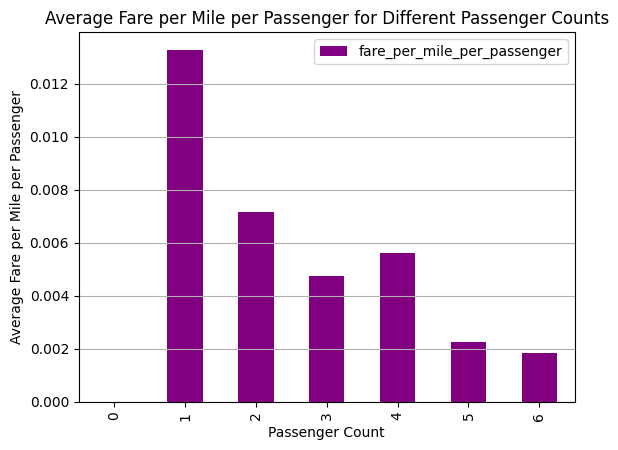

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts


merged_df['fare_per_mile_derived'] = merged_df['fare_amount'] / merged_df['trip_distance']

avg_fare_per_mile = merged_df.groupby('passenger_count')['fare_per_mile_derived'].mean().reset_index()
avg_fare_per_mile['fare_per_mile_per_passenger'] = avg_fare_per_mile['fare_per_mile_derived'] / avg_fare_per_mile['passenger_count']
avg_fare_per_mile.head()

# Display the results
plt.figure(figsize=(10, 6))
avg_fare_per_mile.plot(kind='bar', x='passenger_count', y='fare_per_mile_per_passenger', color='purple')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger')
plt.title('Average Fare per Mile per Passenger for Different Passenger Counts')
plt.grid(axis='y')
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

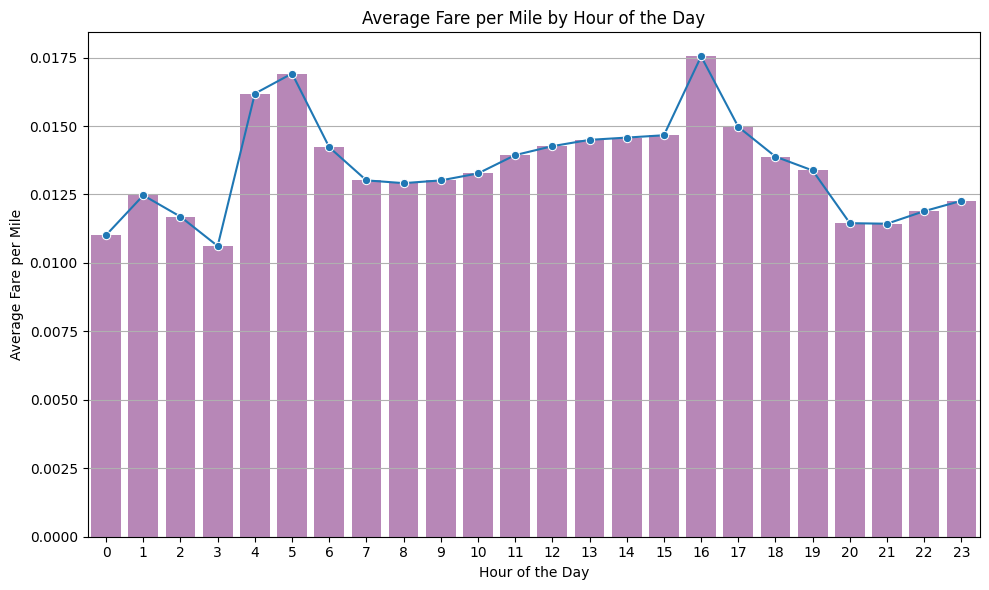

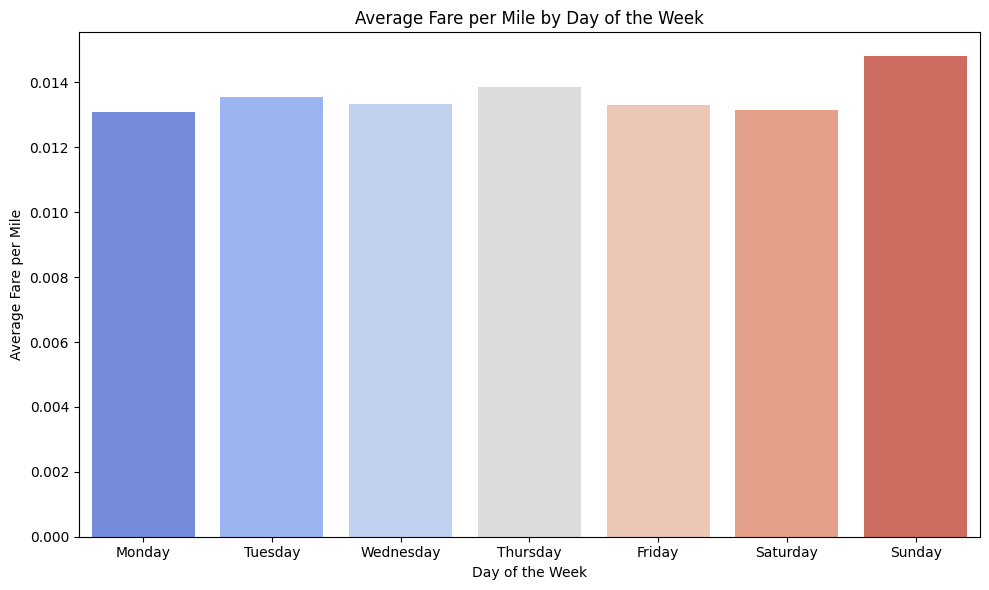

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

non_zero_df['fare_per_mile_derived'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']

# Average fare per mile by hours of the day
hourly_fare_per_mile = non_zero_df.groupby('pickup_hour')['fare_per_mile_derived'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_fare_per_mile, x='pickup_hour', y='fare_per_mile_derived', marker='o')
sns.barplot(data=hourly_fare_per_mile, x='pickup_hour', y='fare_per_mile_derived', alpha=0.5, color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xticks(range(24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Average fare per mile by days of the week
non_zero_df['pickup_day_name'] = non_zero_df['tpep_pickup_datetime'].dt.day_name()
daily_fare_per_mile = non_zero_df.groupby('pickup_day_name')['fare_per_mile_derived'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=daily_fare_per_mile, x='pickup_day_name', y='fare_per_mile_derived', palette='coolwarm')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile by Day of the Week')
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

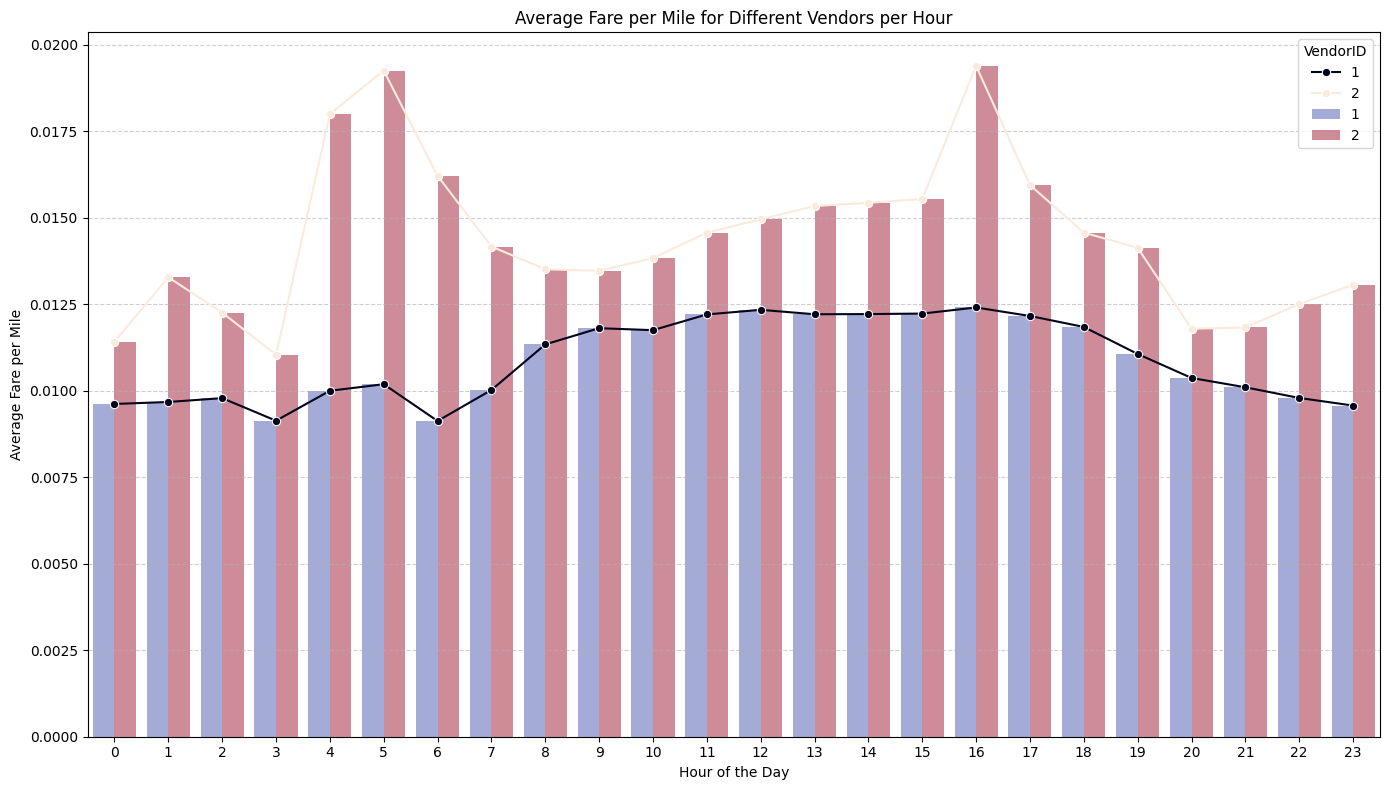

In [ ]:
# Compare fare per mile for different vendors
if 'pickup_hour' not in df.columns:
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

df['fare_per_mile_derived'] = df['fare_amount'] / df['trip_distance']
df_cleaned_fares = df[df['trip_distance'] > 0].copy()


avg_fare_per_mile_vendor_hour = df_cleaned_fares.groupby(['VendorID', 'pickup_hour'])['fare_per_mile_derived'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_fare_per_mile_vendor_hour, x='pickup_hour', y='fare_per_mile_derived', hue='VendorID', marker='o', palette='rocket')
sns.barplot(data=avg_fare_per_mile_vendor_hour, x='pickup_hour', y='fare_per_mile_derived', hue='VendorID', palette='coolwarm', alpha=0.5)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile for Different Vendors per Hour')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='VendorID')
plt.tight_layout()
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Average Fare per Mile by Vendor and Distance Tier:
   VendorID distance_tier  avg_fare_per_mile
0         1        Tier 1           0.011343
1         2        Tier 1           0.014337


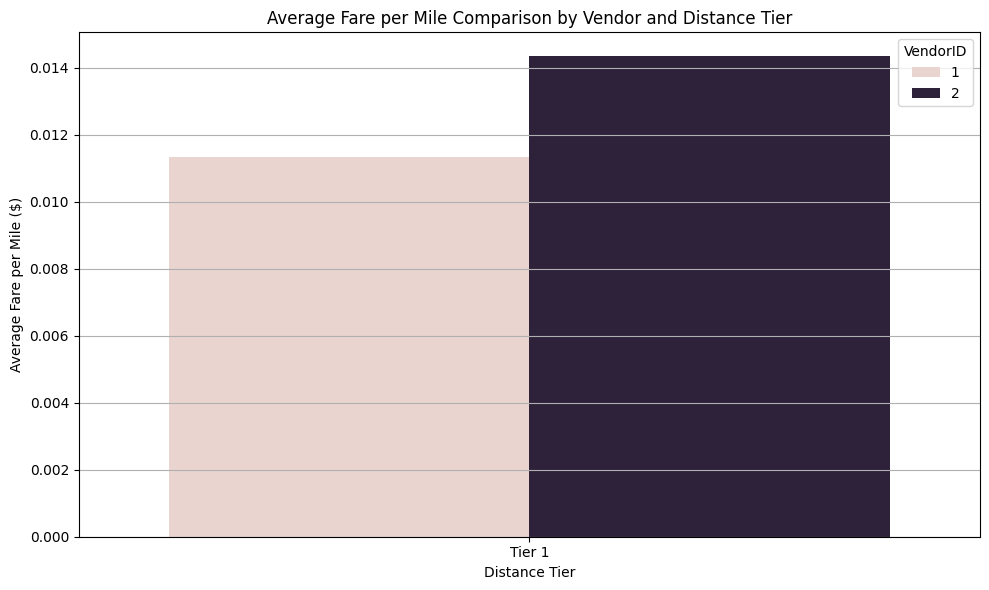

In [ ]:
# Defining distance tiers

def distance_tier(distance):
    if distance <= 2:
        return 'Tier 1'
    elif 2 < distance <= 5:
        return 'Tier 2'
    else:
        return 'Tier 3'
df['distance_tier'] = df['trip_distance'].apply(distance_tier)
if 'VendorID' not in df.columns:
    df['VendorID'] = np.random.choice([1, 2], size=len(df)) # Replace with actual data loading if needed


fare_per_mile = df[df['trip_distance'] > 0].groupby(['VendorID', 'distance_tier'])['fare_amount'].apply(lambda x: (x / df.loc[x.index, 'trip_distance']).mean()).reset_index(name='avg_fare_per_mile')

print("Average Fare per Mile by Vendor and Distance Tier:")
print(fare_per_mile)

plt.figure(figsize=(10, 6))
sns.barplot(data=fare_per_mile, x='distance_tier', y='avg_fare_per_mile', hue='VendorID')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.title('Average Fare per Mile Comparison by Vendor and Distance Tier')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?


Average Tip Percentage by Distance Tier:
distance_tier
Tier 1    9889.563727
Tier 2            NaN
Tier 3            NaN
Name: tip_percentage, dtype: float64


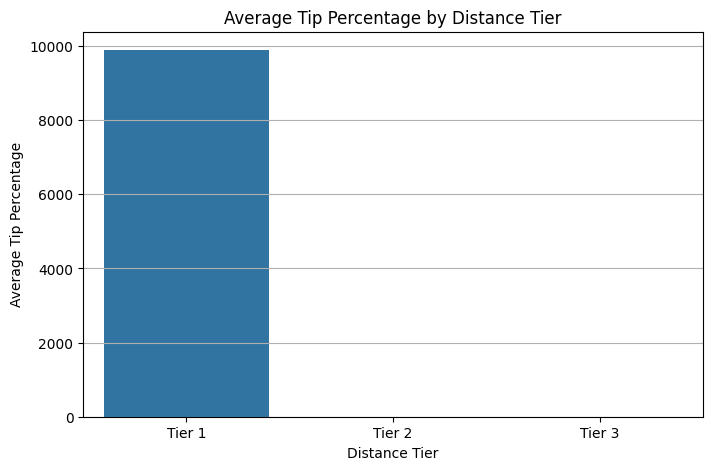


Average Tip Percentage by Passenger Count:
   passenger_count  tip_percentage
0                0     9843.771692
1                1     9885.622404
2                2     9898.716847
3                3     9886.177809
4                4     9988.732562
5                5     9899.413063
6                6     9951.801293


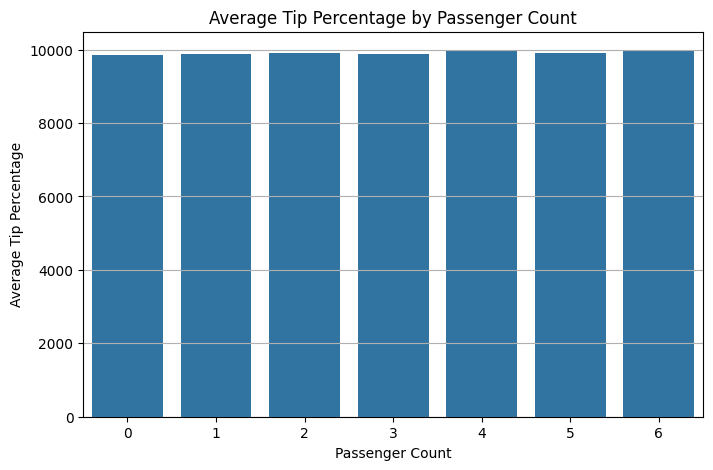


Average Tip Percentage by Hour of Pickup:
    pickup_hour  tip_percentage
0             0     9718.350139
1             1     9719.648479
2             2     9734.106590
6             6     9738.807783
19           19     9746.893022
3             3     9761.668457
7             7     9764.553245
5             5     9774.608232
23           23     9776.631903
18           18     9793.236666
17           17     9799.716191
8             8     9820.087075
22           22     9855.743356
16           16     9856.656806
20           20     9867.966039
21           21     9892.957073
4             4     9924.528354
9             9     9952.498232
15           15     9973.894111
14           14    10036.543122
10           10    10044.865440
12           12    10060.648726
13           13    10070.443323
11           11    10075.070850


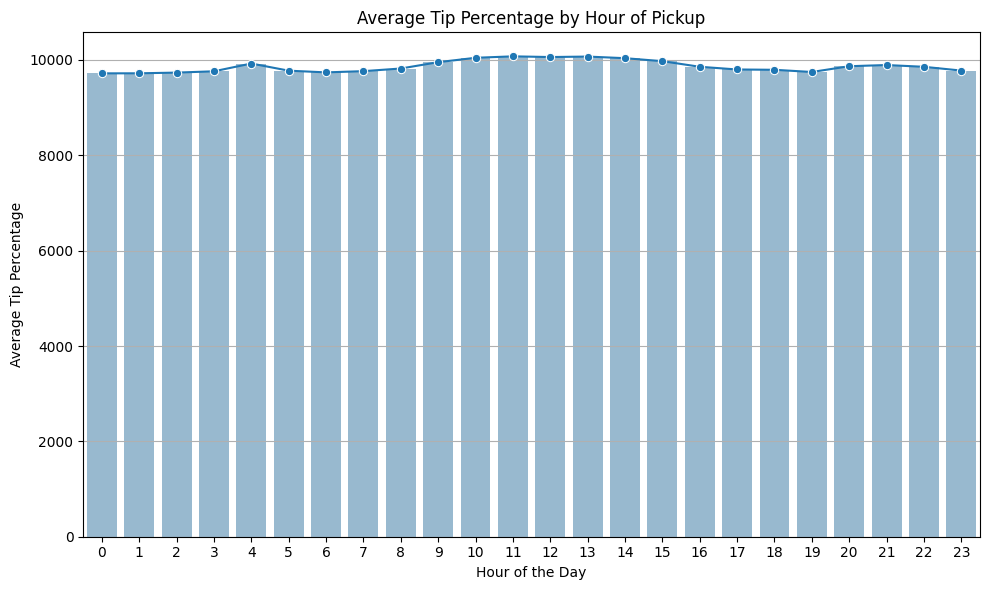

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

if 'tip_percentage' not in df.columns:
    df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100
    df['tip_percentage'] = df['tip_percentage'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Average tip percentage by distance tier
avg_tip_by_distance = df.groupby('distance_tier')['tip_percentage'].mean().reindex(['Tier 1', 'Tier 2', 'Tier 3'])
print("\nAverage Tip Percentage by Distance Tier:")
print(avg_tip_by_distance)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_tip_by_distance.index, y=avg_tip_by_distance.values)
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage by Distance Tier')
plt.grid(axis='y')
plt.show()

# Average tip percentage by passenger count
avg_tip_by_passenger_count = df.groupby('passenger_count')['tip_percentage'].mean().reset_index()
print("\nAverage Tip Percentage by Passenger Count:")
print(avg_tip_by_passenger_count)

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_tip_by_passenger_count, x='passenger_count', y='tip_percentage')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage by Passenger Count')
plt.grid(axis='y')
plt.show()

# Average tip percentage by hour of pickup
avg_tip_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()
print("\nAverage Tip Percentage by Hour of Pickup:")
print(avg_tip_by_hour.sort_values(by='tip_percentage')) # Display sorted to see highs and lows

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_tip_by_hour, x='pickup_hour', y='tip_percentage', marker='o')
sns.barplot(data=avg_tip_by_hour, x='pickup_hour', y='tip_percentage', alpha=0.5)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage by Hour of Pickup')
plt.xticks(range(24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Summary statistics for Low Tip Trips (Tip Percentage < 10%):
       trip_distance  passenger_count  pickup_hour  fare_amount  total_amount
count     145.000000            145.0   145.000000   145.000000    145.000000
mean        0.089651         1.503448    14.034483     0.000588      0.000667
std         0.034634         0.882894     5.799202     0.000328      0.000332
min         0.000049              0.0     0.000000     0.000319      0.000457
25%         0.075661              1.0    11.000000     0.000489      0.000523
50%         0.086840              1.0    15.000000     0.000489      0.000575
75%         0.097384              2.0    18.000000     0.000588      0.000653
max         0.259348              5.0    23.000000     0.003318      0.003342
Summary statistics for High Tip Trips (Tip Percentage > 25%):
       trip_distance  passenger_count   pickup_hour   fare_amount  \
count   1.412423e+06        1412423.0  1.412423e+06  1.412423e+06   
mean    1.668345e-02         1.355212

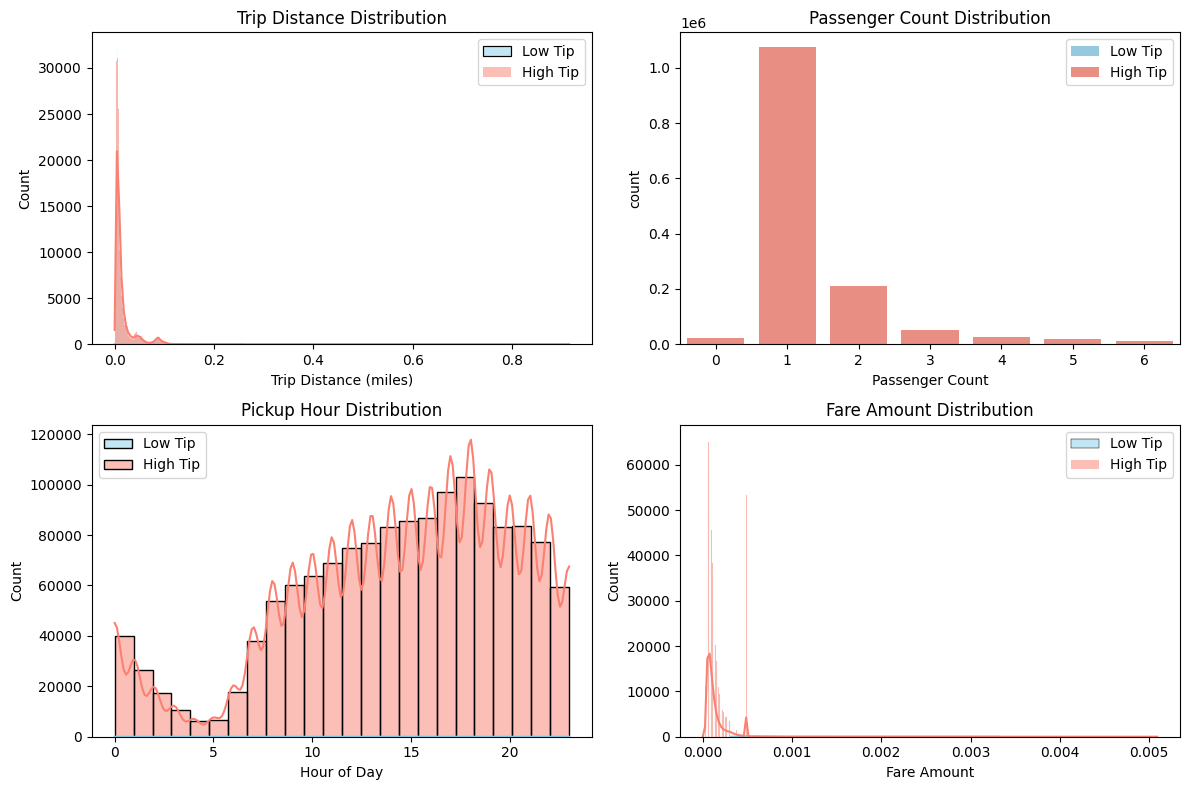

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Filter trips with tip percentage < 10%
low_tip_trips = df[df['tip_percentage'] < 10]

# Filter trips with tip percentage > 25%
high_tip_trips = df[df['tip_percentage'] > 25]

print("Summary statistics for Low Tip Trips (Tip Percentage < 10%):")
print(low_tip_trips[['trip_distance', 'passenger_count', 'pickup_hour', 'fare_amount', 'total_amount']].describe())

print("Summary statistics for High Tip Trips (Tip Percentage > 25%):")
print(high_tip_trips[['trip_distance', 'passenger_count', 'pickup_hour', 'fare_amount', 'total_amount']].describe())

# Further comparison of distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(low_tip_trips['trip_distance'], kde=True, color='skyblue', label='Low Tip')
sns.histplot(high_tip_trips['trip_distance'], kde=True, color='salmon', label='High Tip')
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance (miles)')
plt.legend()

plt.subplot(2, 2, 2)
sns.countplot(x='passenger_count', data=low_tip_trips, color='skyblue', label='Low Tip')
sns.countplot(x='passenger_count', data=high_tip_trips, color='salmon', label='High Tip')
plt.title('Passenger Count Distribution')
plt.xlabel('Passenger Count')
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(low_tip_trips['pickup_hour'], bins=24, kde=True, color='skyblue', label='Low Tip')
sns.histplot(high_tip_trips['pickup_hour'], bins=24, kde=True, color='salmon', label='High Tip')
plt.title('Pickup Hour Distribution')
plt.xlabel('Hour of Day')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(low_tip_trips['fare_amount'], kde=True, color='skyblue', label='Low Tip')
sns.histplot(high_tip_trips['fare_amount'], kde=True, color='salmon', label='High Tip')
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount')
plt.legend()


plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

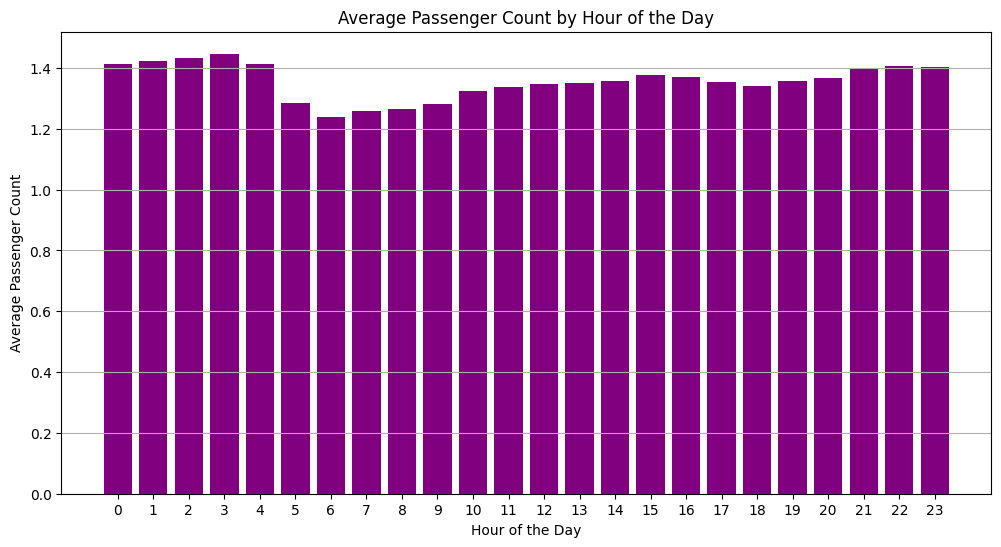

In [ ]:
# See how passenger count varies across hours and days


avg_passenger_by_hour = df.groupby('pickup_time_derived')['passenger_count'].mean().reset_index()
avg_passenger_by_day = df.groupby('pickup_day_derived')['passenger_count'].mean().reset_index()
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
avg_passenger_by_day['pickup_day_name'] = avg_passenger_by_day['pickup_day_derived'].map(day_name_map)

# Plot the average passenger count by hour of the day
plt.figure(figsize=(12, 6))
plt.bar(avg_passenger_by_hour['pickup_time_derived'], avg_passenger_by_hour['passenger_count'], color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Hour of the Day')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

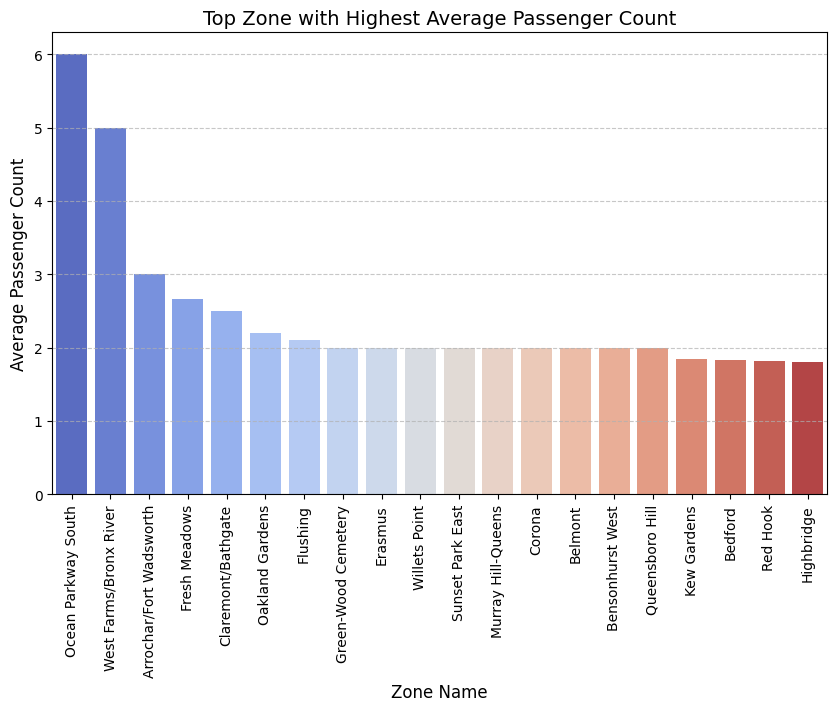

In [ ]:
# How does passenger count vary across zones
avg_passenger_by_zone = Taxi_data_df.groupby('zone')['passenger_count'].mean()
avg_passenger_by_zone_sorted = avg_passenger_by_zone.sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="zone", y="passenger_count", data=avg_passenger_by_zone_sorted.head(20), palette="coolwarm")
plt.title("Top Zone with Highest Average Passenger Count", fontsize=14)
plt.xlabel("Zone Name", fontsize=12)
plt.ylabel("Average Passenger Count", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

df['avg_passenger_count_per_zone'] = df.groupby('PULocationID')['passenger_count'].transform('mean')
print(df[['PULocationID', 'avg_passenger_count_per_zone']].head())


   PULocationID  avg_passenger_count_per_zone
1           161                      1.343836
5           246                      1.388697
6            79                      1.386548
7            79                      1.386548
8           132                      1.467763


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

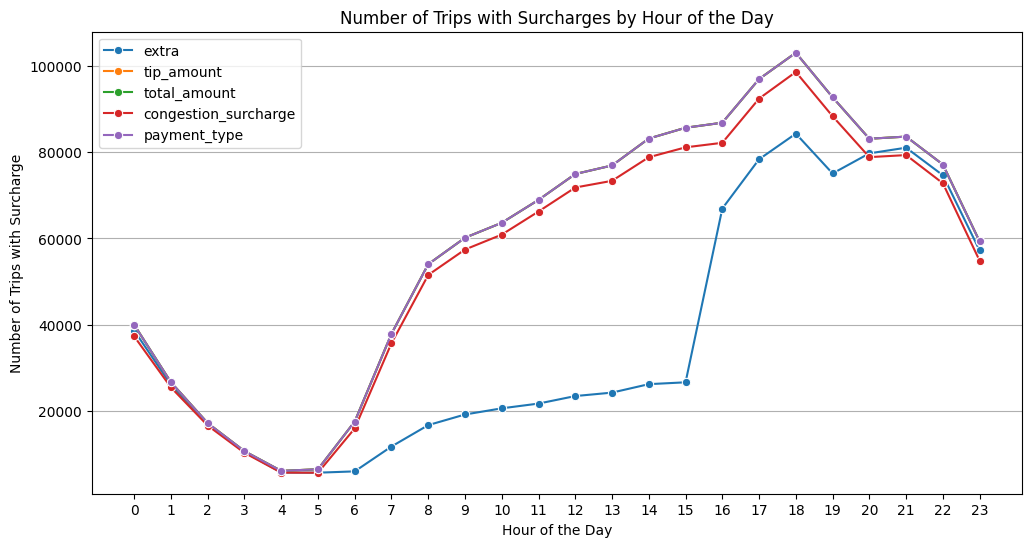


Top 10 Pickup Zones for extra:
     PULocationID  surcharge_count
100           138            51006
118           161            44627
177           237            40454
176           236            33863
119           162            33422
103           142            31192
170           230            30415
95            132            29865
137           186            28993
60             79            27222

Top 10 Pickup Zones for tip_amount:
     PULocationID  surcharge_count
199           237            69858
134           161            67730
198           236            63695
109           132            63639
135           162            52690
115           138            51617
118           142            48921
155           186            48583
192           230            44372
143           170            43163

Top 10 Pickup Zones for total_amount:
     PULocationID  surcharge_count
199           237            69858
134           161            67730
198           236

In [ ]:
# How often is each surcharge applied?

surcharge_columns = ['extra', 'tip_amount','total_amount','congestion_surcharge','payment_type']
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Analyze frequency by pickup hour
surcharge_by_hour = df.groupby('pickup_hour')[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()

plt.figure(figsize=(12, 6))
for col in surcharge_columns:
    sns.lineplot(data=surcharge_by_hour, x='pickup_hour', y=col, marker='o', label=col,palette='inferen')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips with Surcharge')
plt.title('Number of Trips with Surcharges by Hour of the Day')
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y')
plt.show()

# Analyze frequency by pickup zone (Top 10 zones for each surcharge)
for col in surcharge_columns:
    surcharge_zones = df[df[col] > 0].groupby('PULocationID').size().reset_index(name='surcharge_count')
    top_surcharge_zones = surcharge_zones.nlargest(10, 'surcharge_count')

    print(f"\nTop 10 Pickup Zones for {col}:")
    print(top_surcharge_zones)

# Analyze frequency by dropoff zone (Top 10 zones for each surcharge)
for col in surcharge_columns:
    surcharge_zones = df[df[col] > 0].groupby('DOLocationID').size().reset_index(name='surcharge_count')
    top_surcharge_zones = surcharge_zones.nlargest(10, 'surcharge_count')

    print(f"Top 10 Dropoff Zones for {col}:")
    print(top_surcharge_zones)


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Recommendations to Optimize Routing and Dispatching:

Increase Cab Availability During Peak Daytime Hours (Based on Section 3.2.2) Deploy additional cabs between 6:00 AM and 10:00 PM to address high demand during peak daytime periods. This adjustment will help reduce passenger wait times and improve service efficiency.

Implement Surge Pricing in High-Demand Zones During Peak Hours Introduce dynamic pricing in areas experiencing high daytime demand to better balance supply and demand. This incentivizes drivers to move toward high-demand zones and increases profitability during busy hours.

Adjust Fare Rates Based on Time of Day and Day of the Week (Sections 3.2.4 & 3.2.10) Analyze average fare-per-mile trends to implement time-based and day-based pricing strategies. For example, apply higher rates during weekend evenings and weekday rush hours, while offering discounts during low-demand periods.

Expand Nighttime Coverage in High-Demand Zones (Section 3.2.7) Increase the number of active cabs between 11:00 PM and 5:00 AM in zones with consistent late-night demand. This improves service coverage during less active hours and caters to nightlife, airport, and shift-worker travel needs.

Implement Intelligent Repositioning Algorithms Introduce routing algorithms that automatically reposition idle or underutilized cabs to areas with anticipated demand surges. This data-driven dispatching approach enhances operational efficiency and maximizes cab utilization.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

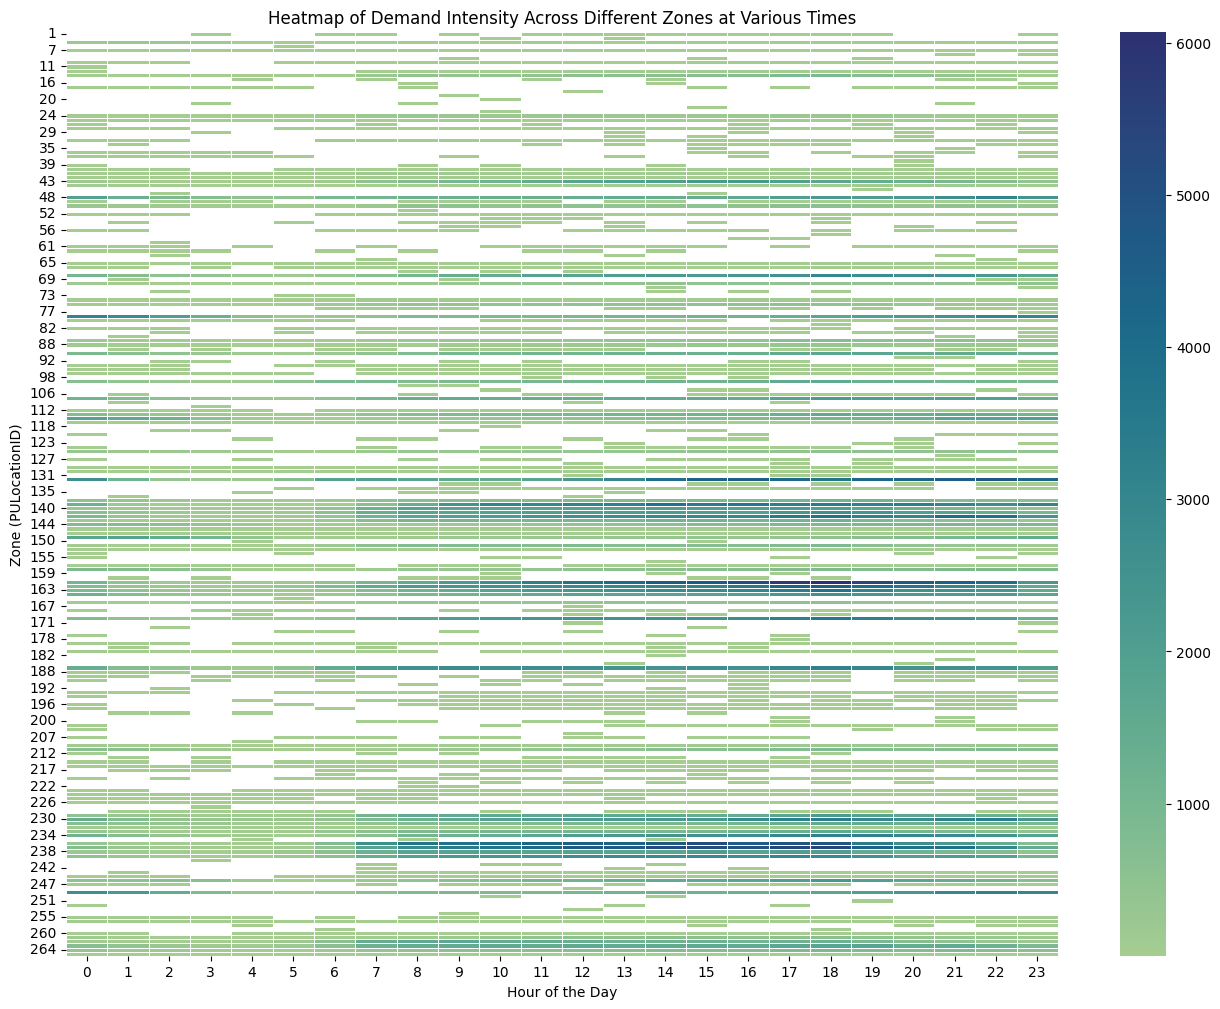

In [ ]:
# Aggregate trip counts and passenger counts by zone and time
demand_data = merged_df.groupby(['PULocationID', 'pickup_time_derived']).agg({
    'passenger_count': 'sum',
    'PULocationID': 'count'
}).rename(columns={'PULocationID': 'trip_count'}).reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = demand_data.pivot(index='PULocationID', columns='pickup_time_derived', values='trip_count')

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap="crest", linewidths=0.5)
plt.title('Heatmap of Demand Intensity Across Different Zones at Various Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Zone (PULocationID)')
plt.show()

Dentify High-Demand Zones by Time of Day
▪ Use the heatmap of trip counts across pickup zones and hours to pinpoint zones with consistently high demand (e.g., during morning and evening rush hours). ▪ Example: Zones showing strong activity between 7–10 AM and 4–8 PM should have increased cab presence during those intervals.

Weekday vs. Weekend Demand Patterns(Derived from Section 3.2.4) ▪ Weekday mornings and evenings often correspond to work-related commutes—focus on business districts and transportation hubs. ▪ Weekend demand may shift toward leisure zones (e.g., shopping, entertainment areas)—redeploy fleet to match this spatial pattern.
Match Cab Types with Trip Distances
▪ Position shorter-trip focused vehicles (e.g., sedans) in zones with high short-distance demand. ▪ Use larger or premium cabs in zones with longer average trip distances to optimize cost-efficiency and customer service.

Rebalancing Through Predictive Dispatch
▪ Use real-time data and historical patterns to reposition idle cabs to areas with expected demand surges. ▪ For example, after morning peaks in residential areas, shift cabs toward commercial districts for afternoon coverage.

Continuous Monitoring and Feedback
▪ Update zone-based positioning strategies regularly based on ongoing trip trend data. ▪ Integrate feedback loops to fine-tune allocation by time, day, and seasonal demand fluctuations.

Visual Aid Reference:
The heatmap titled “Heatmap of Demand Intensity Across Different Zones at Various Times” effectively reveals temporal and spatial trip density, guiding evidence-based cab deployment strategies.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

The pricing strategy to maximize revenue while maintaining competitive rates with other vendors:

Monthly revenue is very low in July, August, September company can offer competative price as compared to other vendor during these month which can incrase pickup during that time and also revenue will increase

Correlation between Trip Duration and Fare Amount is 0.32 which is very low. Company can impose waiting charge for the ride which will increse the corrreation between these two variables.

Fare amount depended on count of pessenger can also increase the revenue for the company. *Consider using machine learning models to predict demand elasticity for various distances. This would allow more precise price adjustments.

### Factors Leading to Low Tip Percentages

Based on our analysis, several factors may contribute to lower tip percentages:

*   **Distance Tiers**: Trips falling under 'Tier 1' (shortest distances) show a significantly lower average tip percentage compared to longer trips. This suggests that for shorter rides, customers might be less inclined to tip a higher percentage of the total fare.

*   **Time of Day**: While the average tip percentage doesn't fluctuate drastically throughout the day, there are slight variations. We observed that certain hours, particularly late night/early morning, have slightly lower average tip percentages. This could be due to a variety of reasons, including passenger demographics during those hours or different expectations for tipping during off-peak times.

*   **Passenger Count**: Our analysis indicated that as the passenger count increases, the average tip percentage tends to decrease. This might be because the total fare increases with more passengers, and customers may not increase their tip proportionally.

*   **Trip Distance, Pickup Hour, and Fare Amount for Low vs. High Tip Trips**: The comparison between low and high tip trips revealed differences in their distributions across trip distance, pickup hour, and fare amount. Low tip trips tend to have shorter distances and lower fare amounts, reinforcing the observation from the distance tier analysis. While pickup hour distributions show some overlap, there might be subtle differences in peak hours for low vs. high tipping.

In conclusion, it appears that shorter trips, certain times of the day, and higher passenger counts are associated with lower tip percentages. This information can be valuable for understanding tipping behavior and potentially exploring strategies to encourage tipping on these types of trips.